# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dina Oktavia Dwi Irmawati
- **Email:** dinaaoktaviaa25@gmail.com
- **ID Dicoding:** dinaokavia25

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah ada pola atau tren peningkatan atau penurunan dalam nilai pembayaran dari waktu ke waktu?
- Pertanyaan 2: Apakah terdapat kategori produk tertentu yang memberikan kontribusi signifikan terhadap total pendapatan
- Pertanyaan 3: Kota apa dengan jumlah pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from babel.numbers import format_currency
from datetime import datetime

## Data Wrangling

### Gathering Data

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Membaca data csv
df_orders = pd.read_csv("/content/drive/MyDrive/DICODING/olist_orders_dataset.csv")
df_payments = pd.read_csv("/content/drive/MyDrive/DICODING/olist_order_payments_dataset.csv")
df_items = pd.read_csv("/content/drive/MyDrive/DICODING/olist_order_items_dataset.csv")
df_products = pd.read_csv("/content/drive/MyDrive/DICODING/olist_products_dataset.csv")
df_customers = pd.read_csv("/content/drive/MyDrive/DICODING/olist_customers_dataset.csv")

In [85]:
# Penggabungan data "df_orders" dengan "df_payments". Primary key: "order_id"
orders_payments_df = pd.merge(
    left=df_orders,
    right=df_payments,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [86]:
# Penggabungan data "df_items" dengan "df_products". Primary key: "product_id"
items_products_df = pd.merge(
    left=df_items,
    right=df_products,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

### Assessing Data

**Assessing Data orders_payments_df**

In [87]:
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103711 non-null  object 
 5   order_delivered_carrier_date   101998 non-null  object 
 6   order_delivered_customer_date  100754 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   payment_sequential             103886 non-null  int64  
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  int64  
 11  payment_value                  103886 non-null  float64
dtypes: float64(1), int64(2), objec

In [88]:
orders_payments_df.isnull().sum() #missing value

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [89]:
orders_payments_df.duplicated().sum() #duplikat

0

In [90]:
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Assessing Data items_products**

In [91]:
items_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [92]:
items_products_df.isnull().sum() #missing value

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

In [93]:
items_products_df.duplicated().sum()

0

In [94]:
items_products_df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Assessing Data df_customers**

In [95]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [96]:
df_customers.duplicated().sum()

0

### Cleaning Data

1. Pada penggabungan data "order_payments_df" terdapat missing value pada 3 kolom, namun kolom tersebut tidak akan digunakan pada proses Exploratory Data Analysis sehingga tidak ada data yang dibuang dan juga tidak ada duplikat. Jadi proses cleaning data hanya mengubah tipe data string ke datetime

2. Pada penggabungan data "items_products_df terdapat missing value pada 4 kolom, namun kolom tersebut tidak akan digunakan pada proses Exploratory Data Analysis sehingga tidak ada data yang dibuang dan juga tidak ada duplikat. Jadi hanya menyamaratakan tipe data float

3. Pada data "df_customers" tidak ada missing value dan duplikat sehingga tidak ada proses cleaning data

In [97]:
# Ubah tipe data beberapa kolom menjadi datetime pada penggabungan data "orders_payments_df"
convert_to_datetime = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
orders_payments_df[convert_to_datetime] = orders_payments_df[convert_to_datetime].apply(pd.to_datetime)
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  datetime64[ns]
 4   order_approved_at              103711 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 6   order_delivered_customer_date  100754 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103886 non-null  datetime64[ns]
 8   payment_sequential             103886 non-null  int64         
 9   payment_type                   103886 non-null  object        
 10  payment_installments           103886 non-null  int64         
 11  

In [98]:
# Menyamaratakan tipe data float pada kolom "price" dan "freight_value" untuk penggabungan data: "items_products_df"
items_products_df[["price", "freight_value"]] = items_products_df[["price", "freight_value"]].astype(float)

## Exploratory Data Analysis (EDA)

### Explore "orders_payments_df"
**Analisis tren nilai pembayaran dari waktu ke waktu pada tahun 2016-2018**

In [99]:
def create_payment_by_timestamp(df):
  df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
  df["month_year"] = df["order_purchase_timestamp"].dt.to_period('M')
  payment_by_timestamp = df.groupby("month_year")["payment_value"].sum().reset_index()
  return payment_by_timestamp
payment_by_timestamp = create_payment_by_timestamp(orders_payments_df)

In [100]:
payment_by_timestamp

,month_year,payment_value
0,2016-09,252.24
1,2016-10,59090.48
2,2016-12,19.62
3,2017-01,138488.04
4,2017-02,291908.01
5,2017-03,449863.60
6,2017-04,417788.03
7,2017-05,592918.82
8,2017-06,511276.38
9,2017-07,592382.92


### Explore "items_products_df"
**Analisis kategori produk berdasarkan pendapatan(revenue)**

In [101]:
def create_product_category(df):
  product_category = df.groupby("product_category_name").agg(
      count_product=('product_category_name', 'count'),
      total_price=('price', 'sum')
  ).reset_index()
  product_category["revenue"] = product_category["total_price"] * product_category["count_product"]
  product_category = product_category.sort_values(by='count_product', ascending=False)
  return product_category

product_category = create_product_category(items_products_df)

In [65]:
product_category

,product_category_name,count_product,total_price,revenue
13,cama_mesa_banho,11115,1036988.68,1.152613e+10
11,beleza_saude,9670,1258681.34,1.217145e+10
32,esporte_lazer,8641,988048.97,8.537731e+09
54,moveis_decoracao,8334,729762.49,6.081841e+09
44,informatica_acessorios,7827,911954.32,7.137866e+09
...,...,...,...,...
17,cds_dvds_musicais,14,730.00,1.022000e+04
46,la_cuisine,14,2054.99,2.876986e+04
60,pc_gamer,9,1545.95,1.391355e+04
37,fashion_roupa_infanto_juvenil,8,569.85,4.558800e+03


### Explore "df_customers"
**Analisis jumlah pelanggan pada tiap-tiap kota**

In [102]:
def create_customer_city(df):
  city = df['customer_city'].value_counts().reset_index()
  city.columns = ['customer_city', 'city_count']
  city = city.sort_values(by='city_count', ascending=False).reset_index(drop=True)
  return city
city = create_customer_city(df_customers)

In [103]:
city

,customer_city,city_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,palmares paulista,1
4115,pires ferreira,1
4116,vicente dutra,1
4117,alagoa nova,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola atau tren peningkatan atau penurunan dalam nilai pembayaran dari waktu ke waktu?

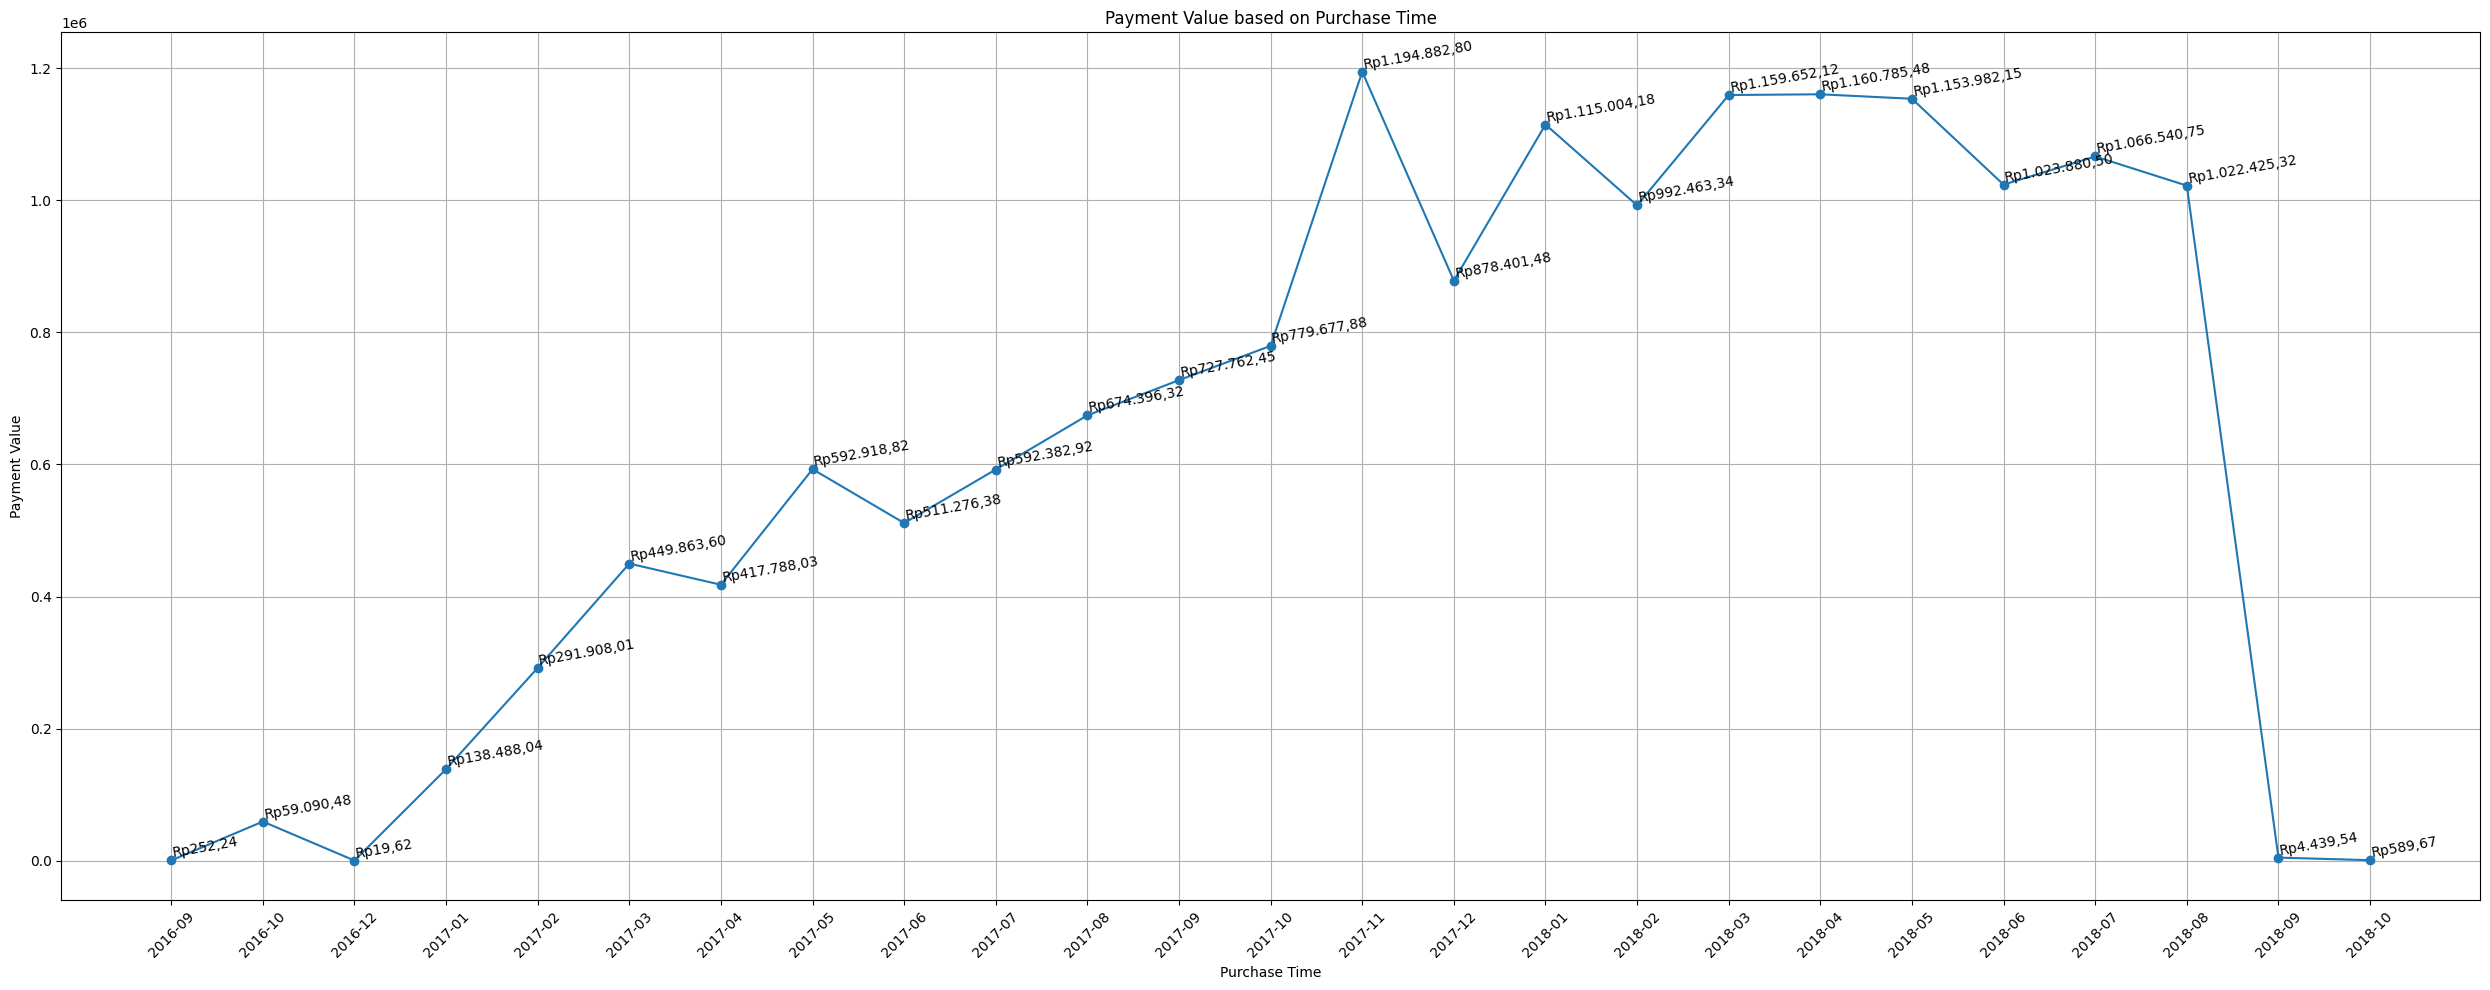

In [104]:
# Plot data menggunakan matplotlib
plt.figure(figsize=(25, 10))
plt.plot(payment_by_timestamp["month_year"].astype(str), payment_by_timestamp["payment_value"], marker='o')
plt.xlabel("Purchase Time")
plt.ylabel("Payment Value")
plt.title("Payment Value based on Purchase Time")
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan label nilai pembayaran pada setiap titik data
for index, value in enumerate(payment_by_timestamp["payment_value"]):
  formatted_value = format_currency(value, 'IDR', locale='id_ID')
  plt.text(payment_by_timestamp["month_year"].astype(str)[index], value, formatted_value, ha='left', va='bottom', fontsize=10, rotation=10)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah terdapat kategori produk tertentu yang memberikan kontribusi signifikan terhadap total pendapatan

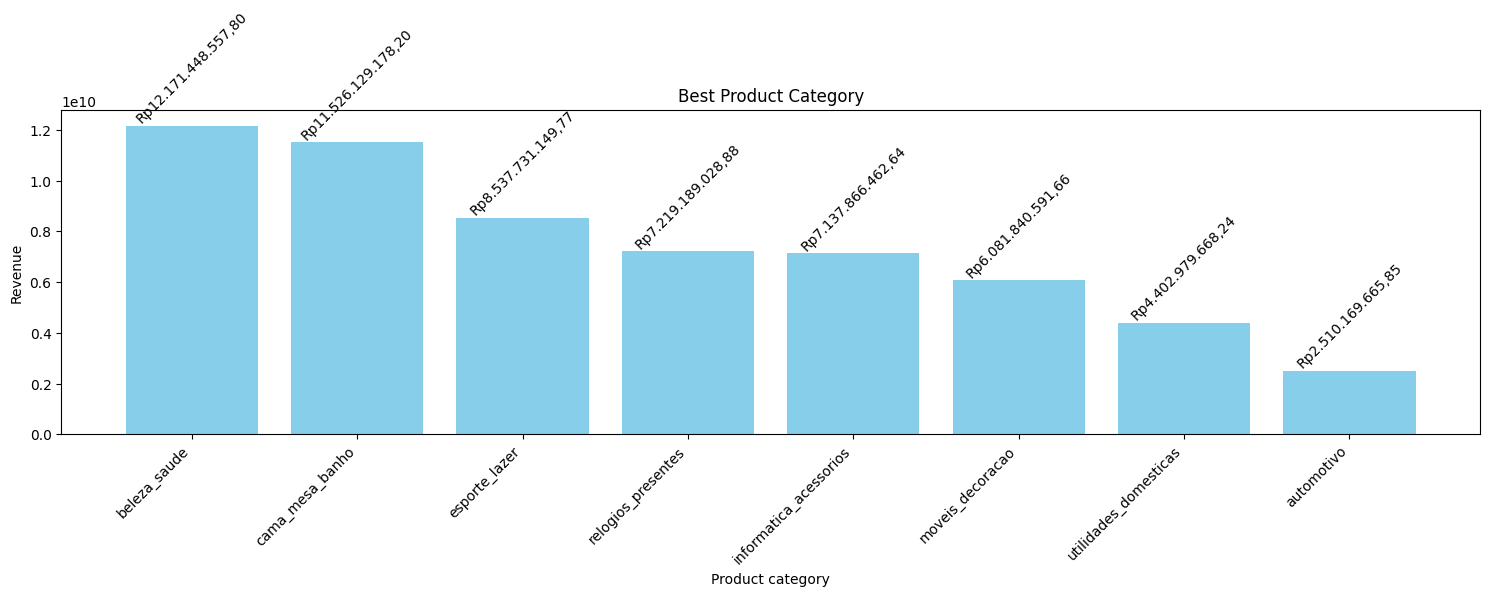

In [105]:
top_products = product_category.sort_values(by="revenue", ascending=False).head(8)
plt.figure(figsize=(15, 6))
plt.bar(top_products["product_category_name"], top_products["revenue"], color="skyblue")
plt.xlabel("Product category")
plt.ylabel("Revenue")
plt.title("Best Product Category")
plt.xticks(rotation=45, ha="right")
for index, value in enumerate(top_products["revenue"]):
  formatted_value = format_currency(value, 'IDR', locale='id_ID')
  plt.text(index, value, formatted_value, ha='center', va='bottom', fontsize=10, rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 3: Kota apa dengan jumlah pelanggan terbanyak?

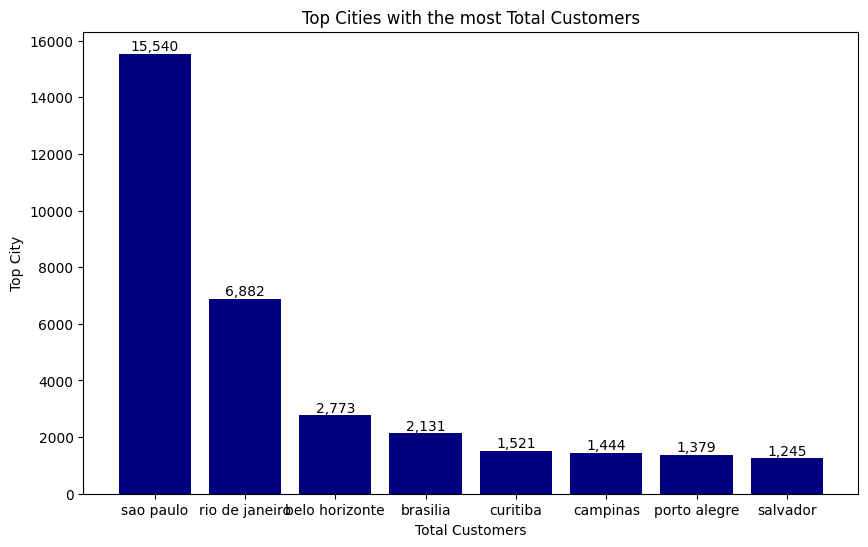

In [106]:
top_cities = city.sort_values(by="city_count", ascending=False).head(8)
plt.figure(figsize=(10, 6))
plt.bar(top_cities["customer_city"], top_cities["city_count"], color='navy')
plt.xlabel("Total Customers")
plt.ylabel("Top City")
plt.title("Top Cities with the most Total Customers")
for index, value in enumerate(top_cities["city_count"]):
  formatted_value = "{:,.0f}".format(value)
  plt.text(index, value, formatted_value, ha='center', va='bottom', fontsize=10, rotation=0)

## Conclusion

- Conclution pertanyaan 1: Nilai pembayaran mengalami peningkatan pada bulan November tahun 2017 (2017-11) dan mengalami penurunan drastis pada bulan September tahun 2018 (2018-12)
- Conclution pertanyaan 2: Produk yang memberikan kontribusi signifikan terhadap total pendapatan (revenue) adalah "Baleze-Saude"
- Conclution pertanyaan 3: Kota dengan jumlah pelanggan terbanyak yaitu Sao Palo